# 2 - EQE Data

**Requirements:**
- None for this dataset; it is public on the Duramat API

**Objectives:**
1. Read in EQE Data from the bifacial field
2. Explore the dataset 


In [1]:
# if running on google colab, uncomment the next line and execute this cell to install the dependencies and prevent "ModuleNotFoundError" in later cells:
# pip install -r ../requirements.txt

In [2]:
import os
import pandas as pd
import json
import pprint as pp
import urllib.request as ur
import urllib.parse as up
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)


Working on a  Windows 10
Python version  3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0


In [4]:
dataset_id ='7cdfed1b-7571-4b28-958e-c62e8f67139b'  # For BEST Field Degradation Research
resource_id='4421d5fc-e7b8-4503-add4-5a988e5a435e'  # '2019-2024 EQE Blind.csv'

# Set your API token. Since this is open-source data, not really needed.
api_token = ''

# build url pieces
emn_datahub = 'https://datahub.duramat.org'

# Helper to build a URI for a given API action
action = lambda a: '{}/api/3/action/{}'.format(emn_datahub, a)        
params = {
    'id': dataset_id,
}
param_string = up.urlencode( params )
#Build composite url for request
url = action('package_show') + '?' + param_string
# https://datahub.duramat.org/api/3/action/package_show
request = ur.Request(url)
# Add authorization
#request.add_header('Authorization', self.dhkey)
response = ur.urlopen(request)
dataset = json.loads(response.read().decode('utf-8'))   

# Find the resource with the specified resource_id
resource_url = None
for resource in dataset['result']['resources']:
    if resource['id'] == resource_id:
        resource_url = resource['url']
        break

if resource_url is None:
    raise ValueError(f'Resource with id {resource_id} not found in dataset {dataset_id}')

#Download the public CKAN url directly to pandas. Note! If you have the actual URL from browsing
#the data hub, you can simply place that resource download URL directly into a pandas read_csv() 
#call.
df = pd.read_csv(resource_url)

In [5]:
df.keys()

Index(['Technology', 'Type', 'Control-Field', 'Side', 'Shot', 'model',
       'Normalization', '310', '325', '340', '365', '385', '405', '415', '430',
       '450', '470', '490', '505', '525', '545', '610', '635', '660', '670',
       '690', '710', '725', '740', '760', '770', '810', '830', '850', '870',
       '890', '920', '945', '970', '990', '1020', '1050', '1070', '1090',
       '1105', '1180', '1195', 'DATE'],
      dtype='object')

In [6]:
TecA = df.loc[df['Normalization']=='Dana'].head(4).T
TecA

,5,7,9,11
Technology,A,A,A,A
Type,bifacial,bifacial,bifacial,bifacial
Control-Field,Control,Control,Field,Field
Side,front,rear,front,rear
Shot,single,single,single,single
model,M1905-0005,M1905-0005,M1905-0022,M1905-0022
Normalization,Dana,Dana,Dana,Dana
310,15.641027,4.349425,11.551697,7.128717
325,35.718531,5.575427,30.604618,7.386191
340,49.247361,8.499512,43.114481,8.811346


In [7]:
import numpy as np
import matplotlib.ticker as ticker

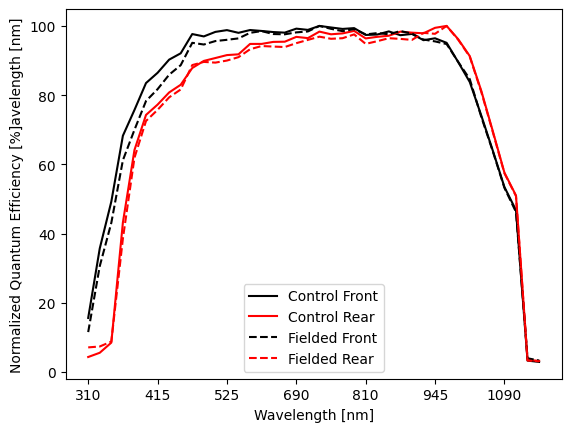

In [8]:
# Ploting EQEs for Control and Field
wavindex=list(TecA.iloc[7:-1].index)  # Indexes
plt.plot(wavindex, TecA[5].iloc[7:-1], 'k', label='Control Front')
plt.plot(wavindex, TecA[7].iloc[7:-1], 'r', label='Control Rear')
plt.plot(wavindex, TecA[9].iloc[7:-1], 'k--', label='Fielded Front')
plt.plot(wavindex, TecA[11].iloc[7:-1], 'r--', label='Fielded Rear')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalized Quantum Efficiency [%]avelength [nm]')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))


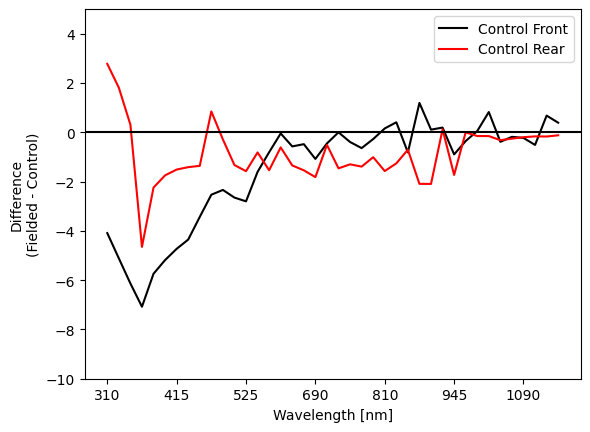

In [9]:
# Ploting Difference in EQEs for Control vs Field
wavindex=list(TecA.iloc[7:-1].index)  # Indexes
plt.plot(wavindex, TecA[9].iloc[7:-1]-TecA[5].iloc[7:-1], 'k', label='Control Front')
plt.plot(wavindex, TecA[11].iloc[7:-1]-TecA[7].iloc[7:-1], 'r', label='Control Rear')

plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Difference\n(Fielded - Control)')
plt.ylim(-10,5)
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))